In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import readsolar as rs

In [3]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.10.1'

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('fivethirtyeight')

### Read Data

In [6]:
sol_pdf = pd.read_csv('solar_data.csv')  

In [7]:
sol_pdf.count()

Timestamp                              703471
Month                                  703471
Current Phase Average (A)              703471
Power (kW)                             703471
Performance Ratio (%)                  703470
Wind Speed (m/s)                       703471
Temperature Celsius (°C)               703471
Relative Humidity (%)                  703471
Global Horizontal Radiation (W/m²)     703471
Diffuse Horizontal Radiation (W/m²)    703471
Wind Direction (Degrees)               703471
Daily Rainfall (mm)                    703471
dtype: int64

In [8]:
sol_pdf.head()

,Timestamp,Month,Current Phase Average (A),Power (kW),Performance Ratio (%),Wind Speed (m/s),Temperature Celsius (°C),Relative Humidity (%),Global Horizontal Radiation (W/m²),Diffuse Horizontal Radiation (W/m²),Wind Direction (Degrees),Daily Rainfall (mm)
0,24/05/2013 0:00,5,0.333667,0.0,NaN,0.987729,8.613059,82.695496,3.097217,1.291908,219.366669,0.0
1,24/05/2013 0:05,5,0.327645,0.0,0.0,0.956214,8.474399,83.062256,2.898489,1.207527,216.402603,0.0
2,24/05/2013 0:10,5,0.332000,0.0,0.0,0.981474,8.443656,83.128723,2.896453,1.202139,209.872070,0.0
3,24/05/2013 0:15,5,0.341667,0.0,0.0,1.003397,8.409176,83.162605,2.936822,1.221855,223.326996,0.0
4,24/05/2013 0:20,5,0.368667,0.0,0.0,0.950703,8.390579,83.621986,2.965931,1.160901,229.209442,0.0


In [9]:
# sol_pdf.plot (kind = 'box', figsize = [16, 8])
sol_pdf.rename(columns={"Power (kW)": "Power", 
                        "Month ": "Month",
                        "Global Horizontal Radiation (W/m²)": "GRad", 
                        "Diffuse Horizontal Radiation (W/m²)":"DRad",
                        "Relative Humidity (%)":"Humid",
                        "Power (kW)":"Power",
                        "Temperature Celsius (°C)":"Temp",
                        "Wind Speed (m/s)":"Wind",
                        "Wind Direction (Degrees)":"WindD",
                        "Daily Rainfall (mm)":"Rain",
                        "Performance Ratio (%)":"Performance",
                        "Current Phase Average (A)":"Current"
                       }, inplace= True)

In [10]:
sol_pdf.head()

,Timestamp,Month,Current,Power,Performance,Wind,Temp,Humid,GRad,DRad,WindD,Rain
0,24/05/2013 0:00,5,0.333667,0.0,NaN,0.987729,8.613059,82.695496,3.097217,1.291908,219.366669,0.0
1,24/05/2013 0:05,5,0.327645,0.0,0.0,0.956214,8.474399,83.062256,2.898489,1.207527,216.402603,0.0
2,24/05/2013 0:10,5,0.332000,0.0,0.0,0.981474,8.443656,83.128723,2.896453,1.202139,209.872070,0.0
3,24/05/2013 0:15,5,0.341667,0.0,0.0,1.003397,8.409176,83.162605,2.936822,1.221855,223.326996,0.0
4,24/05/2013 0:20,5,0.368667,0.0,0.0,0.950703,8.390579,83.621986,2.965931,1.160901,229.209442,0.0


In [11]:
sol_pdf['Timest'] = pd.to_datetime(sol_pdf['Timestamp'])

In [12]:
sol_pdf.dtypes

Timestamp              object
Month                   int64
Current               float64
Power                 float64
Performance           float64
Wind                  float64
Temp                  float64
Humid                 float64
GRad                  float64
DRad                  float64
WindD                 float64
Rain                  float64
Timest         datetime64[ns]
dtype: object

In [15]:
# Set index to query on time seris data
sol_id_pdf = sol_pdf.set_index('Timest')
sol_id_pdf.index
# sol_pdf.set_index('Timestamp_d', inplace = True)

DatetimeIndex(['2013-05-24 00:00:00', '2013-05-24 00:05:00',
               '2013-05-24 00:10:00', '2013-05-24 00:15:00',
               '2013-05-24 00:20:00', '2013-05-24 00:25:00',
               '2013-05-24 00:30:00', '2013-05-24 00:35:00',
               '2013-05-24 00:40:00', '2013-05-24 00:45:00',
               ...
               '2020-05-17 23:10:00', '2020-05-17 23:15:00',
               '2020-05-17 23:20:00', '2020-05-17 23:25:00',
               '2020-05-17 23:30:00', '2020-05-17 23:35:00',
               '2020-05-17 23:40:00', '2020-05-17 23:45:00',
               '2020-05-17 23:50:00', '2020-05-17 23:55:00'],
              dtype='datetime64[ns]', name='Timest', length=703471, freq=None)

In [16]:
# sol_pdf['Year'] = sol_pdf['Timestamp_2'].dt.year
# sol_pdf


### Missing values

In [17]:
sol_id_pdf['Humid'].isnull().sum()
sol_id_pdf['GRad'].isnull().sum()
sol_id_pdf['DRad'].isnull().sum()

0

0

0

In [18]:
sol_id_pdf.isnull().sum()

Timestamp      0
Month          0
Current        0
Power          0
Performance    1
Wind           0
Temp           0
Humid          0
GRad           0
DRad           0
WindD          0
Rain           0
dtype: int64

In [19]:
sol_fill_pdf = sol_id_pdf.fillna(method='bfill')

In [20]:
sol_fill_pdf.isnull().sum()

Timestamp      0
Month          0
Current        0
Power          0
Performance    0
Wind           0
Temp           0
Humid          0
GRad           0
DRad           0
WindD          0
Rain           0
dtype: int64

In [21]:
sol_fill_pdf.head()
sol_fill_pdf.dtypes

,Timestamp,Month,Current,Power,Performance,Wind,Temp,Humid,GRad,DRad,WindD,Rain
Timest,,,,,,,,,,,,
2013-05-24 00:00:00,24/05/2013 0:00,5,0.333667,0.0,0.0,0.987729,8.613059,82.695496,3.097217,1.291908,219.366669,0.0
2013-05-24 00:05:00,24/05/2013 0:05,5,0.327645,0.0,0.0,0.956214,8.474399,83.062256,2.898489,1.207527,216.402603,0.0
2013-05-24 00:10:00,24/05/2013 0:10,5,0.332000,0.0,0.0,0.981474,8.443656,83.128723,2.896453,1.202139,209.872070,0.0
2013-05-24 00:15:00,24/05/2013 0:15,5,0.341667,0.0,0.0,1.003397,8.409176,83.162605,2.936822,1.221855,223.326996,0.0
2013-05-24 00:20:00,24/05/2013 0:20,5,0.368667,0.0,0.0,0.950703,8.390579,83.621986,2.965931,1.160901,229.209442,0.0


Timestamp       object
Month            int64
Current        float64
Power          float64
Performance    float64
Wind           float64
Temp           float64
Humid          float64
GRad           float64
DRad           float64
WindD          float64
Rain           float64
dtype: object

### Filter by Year 

In [22]:
# sol_5_pdf = sol_pdf[(sol_pdf["Year"] == 2017) | (sol_pdf["Year"] == 2018)]
sol_2y_pdf = sol_fill_pdf.loc['2017':'2018']
# sol_2y_pdf = sol_fill_pdf



In [23]:
sol_2y_pdf.shape
sol_2y_pdf[0:10]
# sol_5_pdf.dtypes

(197664, 12)

,Timestamp,Month,Current,Power,Performance,Wind,Temp,Humid,GRad,DRad,WindD,Rain
Timest,,,,,,,,,,,,
2017-01-01 00:00:00,1/01/2017 0:00,1,0.300000,0.0,0.0,0.0,23.591949,78.386978,2.614992,1.116292,331.187469,0.0
2017-01-01 00:05:00,1/01/2017 0:05,1,0.308000,0.0,0.0,0.0,23.522667,78.147202,2.546350,1.109346,332.036804,0.0
2017-01-01 00:10:00,1/01/2017 0:10,1,0.300667,0.0,0.0,0.0,23.543520,76.415466,2.238121,0.830397,333.193787,0.0
2017-01-01 00:15:00,1/01/2017 0:15,1,0.308667,0.0,0.0,0.0,23.592113,74.674438,2.189081,0.667913,341.378265,0.0
2017-01-01 00:20:00,1/01/2017 0:20,1,0.300000,0.0,0.0,0.0,23.604311,72.949600,2.016329,0.557508,339.511810,0.0
2017-01-01 00:25:00,1/01/2017 0:25,1,0.300667,0.0,0.0,0.0,23.549110,73.037048,2.412856,0.979264,327.776977,0.0
2017-01-01 00:30:00,1/01/2017 0:30,1,0.304667,0.0,0.0,0.0,23.453009,72.839973,2.445944,0.987325,314.057983,0.0
2017-01-01 00:35:00,1/01/2017 0:35,1,0.300667,0.0,0.0,0.0,23.379740,73.167122,2.419475,0.944611,324.421265,0.0
2017-01-01 00:40:00,1/01/2017 0:40,1,0.300000,0.0,0.0,0.0,23.346565,72.615082,2.295417,0.893431,327.539368,0.0


### Humid

/Users/test/.local/share/virtualenvs/Solar_Case-_VuekYFI/lib/python3.7/site-packages/seaborn/axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


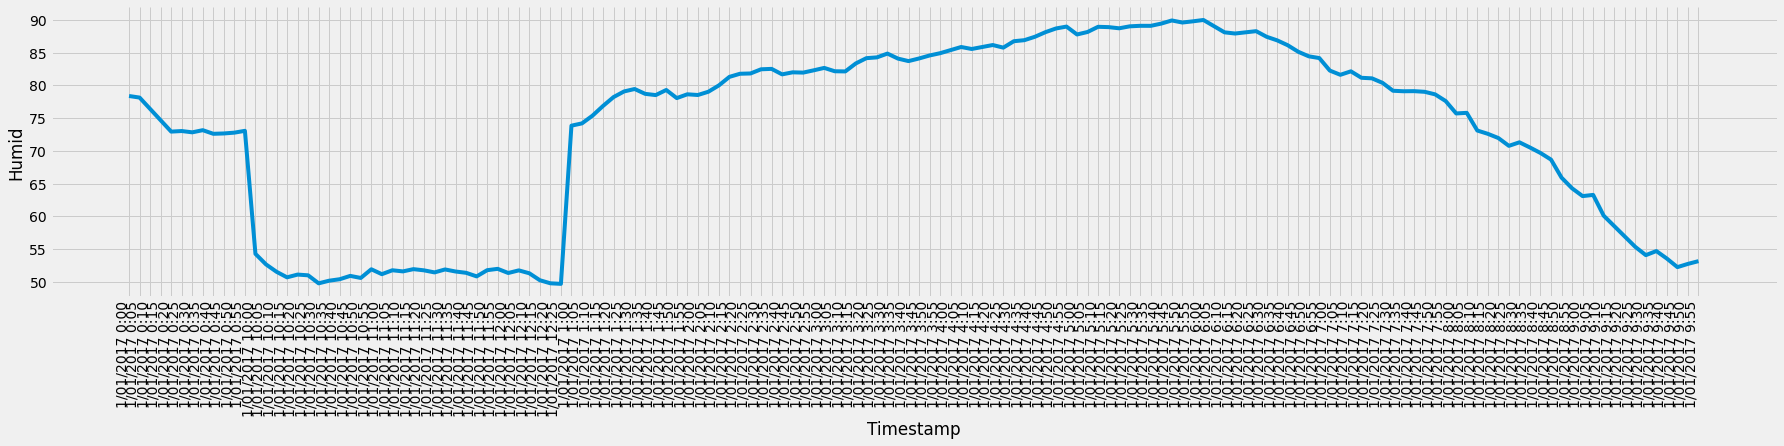

In [59]:
chart = sns.relplot(x="Timestamp", y="Humid", kind="line", ci = None, data=sol_2y_pdf[0:150], height=5, aspect=5)
chart.set_xticklabels( rotation=90, horizontalalignment='right')
# chart.savefig("humid_1.png")

### Power 

/Users/test/.local/share/virtualenvs/Solar_Case-_VuekYFI/lib/python3.7/site-packages/seaborn/axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


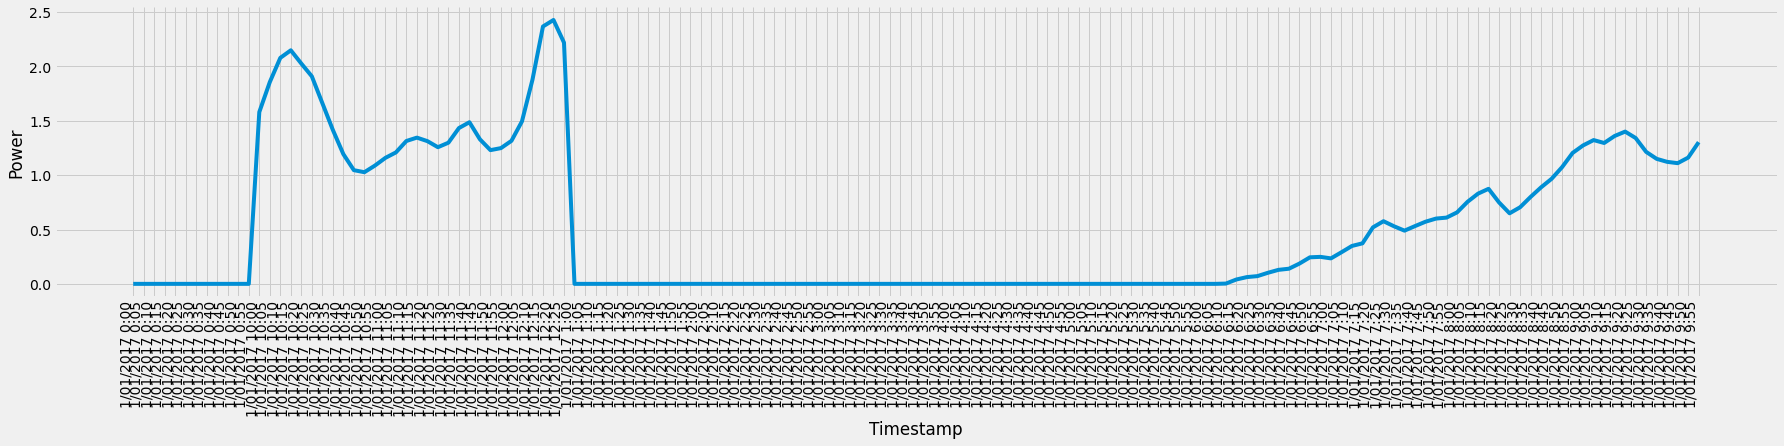

In [55]:
chart = sns.relplot(x="Timestamp", y="Power", kind="line", ci = None, data=sol_2y_pdf[0:150], height=5, aspect=5)
chart.set_xticklabels( rotation=90, horizontalalignment='right')
# chart.savefig("humid_1.png")

### Rolling Avg Humid

In [52]:
sol_2y_pdf['RHumid'] = sol_2y_pdf['Humid'].rolling(window=12).mean()

In [53]:
# sol_2y_pdf[11:20]

/Users/test/.local/share/virtualenvs/Solar_Case-_VuekYFI/lib/python3.7/site-packages/seaborn/axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


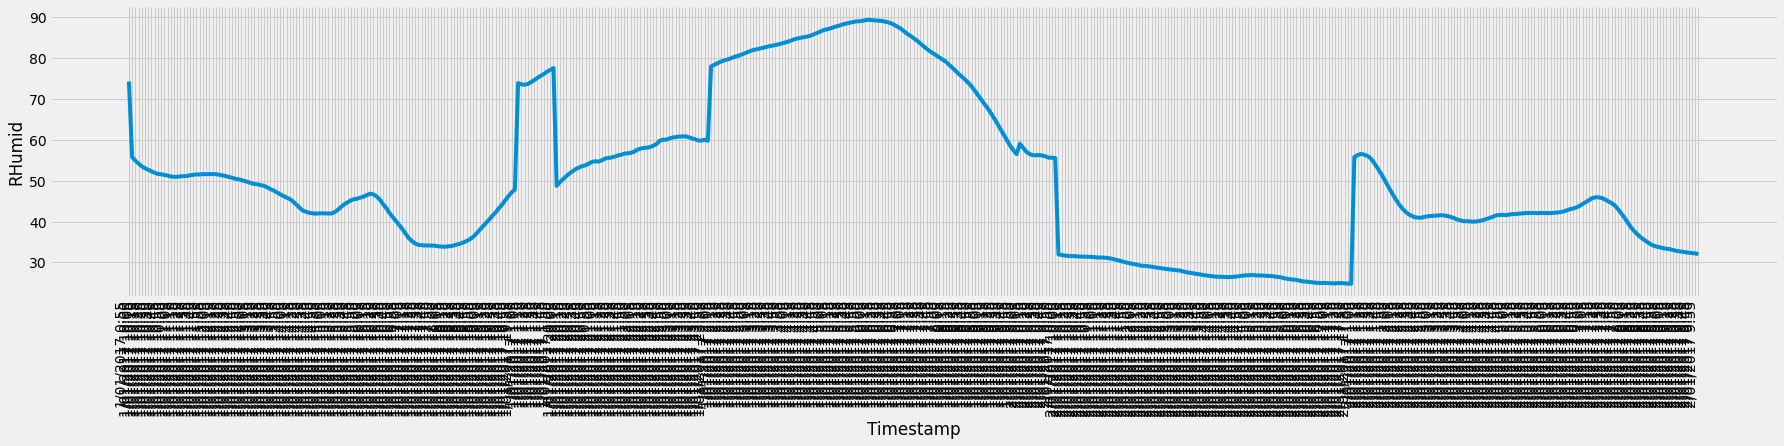

In [57]:
chart = sns.relplot(x="Timestamp", y="RHumid", kind="line", ci = None, data=sol_2y_pdf[11:500], height=5, aspect=5)
chart.set_xticklabels( rotation=90, horizontalalignment='right')
# chart.savefig("humid_1.png")

### Rolling Avg Power

In [42]:
sol_2y_pdf['RPower'] = sol_2y_pdf['Power'].rolling(window=12).mean()

In [43]:
# sol_2y_pdf[11:20]

/Users/test/.local/share/virtualenvs/Solar_Case-_VuekYFI/lib/python3.7/site-packages/seaborn/axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


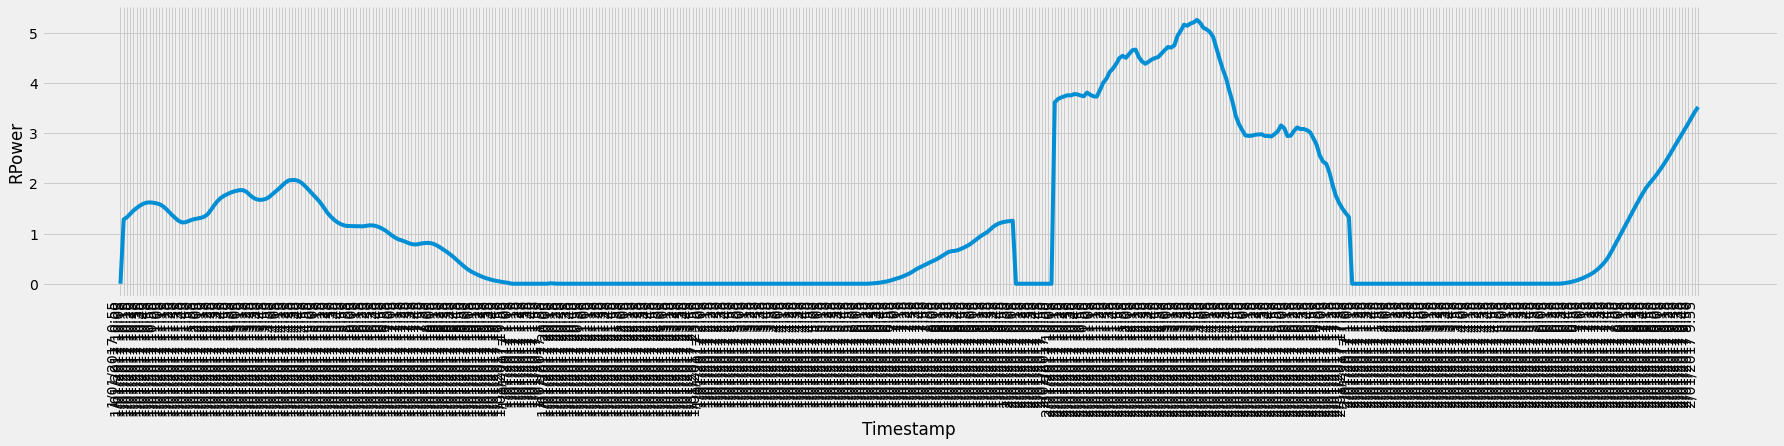

In [56]:
chart = sns.relplot(x="Timestamp", y="RPower", kind="line", ci = None, data=sol_2y_pdf[11:500], height=5, aspect=5)
chart.set_xticklabels( rotation=90, horizontalalignment='right')
# chart.savefig("humid_1.png")

### Avg Temp monthly

In [28]:
sol_2017_pdf = sol_fill_pdf.loc['2017':'2017']
sol_2018_pdf = sol_fill_pdf.loc['2018':'2018']



In [29]:
len(sol_2017_pdf)
len(sol_2018_pdf)

101433

96231

In [30]:
month_index_17 = sol_2017_pdf.index.month
month_index_18 = sol_2018_pdf.index.month

In [31]:
sol_17Avg_pdf = sol_2017_pdf['Temp'].groupby(month_index_17).mean()
sol_18Avg_pdf = sol_2018_pdf['Temp'].groupby(month_index_18).mean()


<AxesSubplot:xlabel='Timest'>

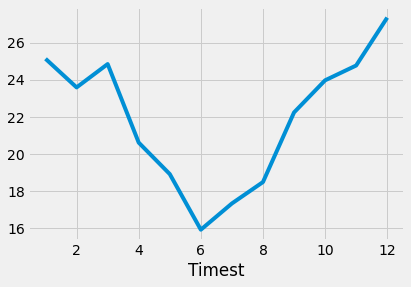

In [32]:
sol_17Avg_pdf.plot()

<AxesSubplot:xlabel='Timest'>

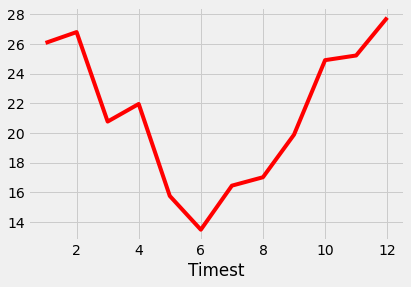

In [33]:
sol_18Avg_pdf.plot(color='red')

### Auto-coorelation

In [34]:
from statsmodels.graphics import tsaplots

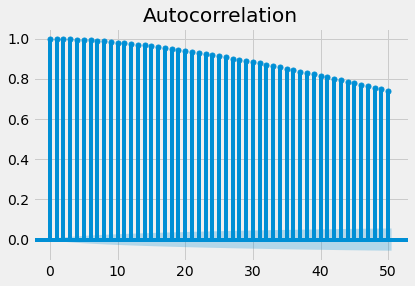

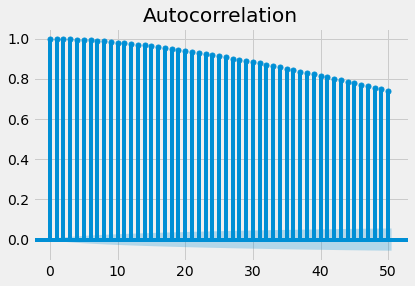

In [37]:
tsaplots.plot_acf(sol_2017_pdf['Temp'], lags = 50)

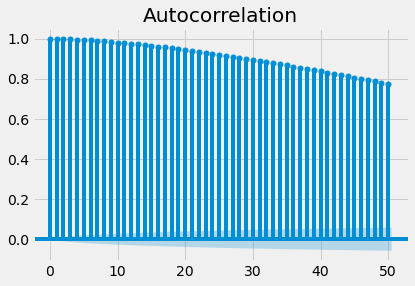

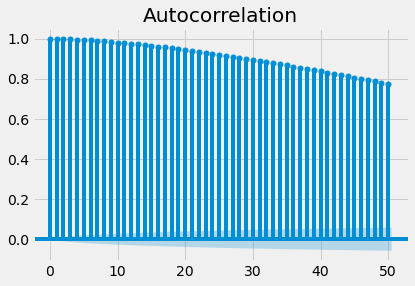

In [33]:
tsaplots.plot_acf(sol_2018_pdf['Temp'], lags = 50)

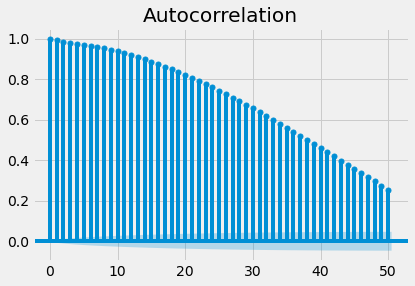

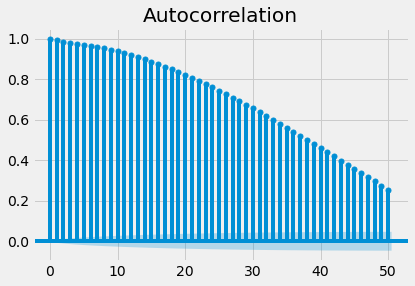

In [41]:
tsaplots.plot_acf(sol_2018_pdf['Power'], lags = 50)

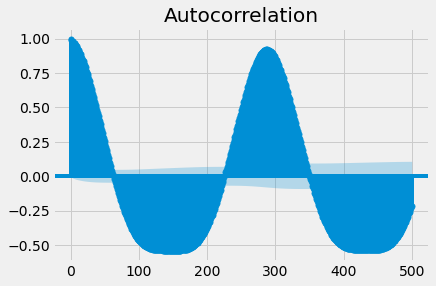

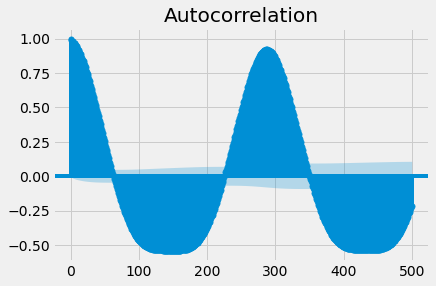

In [40]:
tsaplots.plot_acf(sol_2018_pdf['Power'], lags = 500)

### Seasonal decomposition 

In [34]:
sol_2y_pdf.head()

,Timestamp,Month,Current,Power,Performance,Wind,Temp,Humid,GRad,DRad,WindD,Rain,RHumid
Timestamp_d,,,,,,,,,,,,,
2017-01-01 00:00:00,1/01/2017 0:00,1,0.300000,0.0,0.0,0.0,23.591949,78.386978,2.614992,1.116292,331.187469,0.0,NaN
2017-01-01 00:05:00,1/01/2017 0:05,1,0.308000,0.0,0.0,0.0,23.522667,78.147202,2.546350,1.109346,332.036804,0.0,NaN
2017-01-01 00:10:00,1/01/2017 0:10,1,0.300667,0.0,0.0,0.0,23.543520,76.415466,2.238121,0.830397,333.193787,0.0,NaN
2017-01-01 00:15:00,1/01/2017 0:15,1,0.308667,0.0,0.0,0.0,23.592113,74.674438,2.189081,0.667913,341.378265,0.0,NaN
2017-01-01 00:20:00,1/01/2017 0:20,1,0.300000,0.0,0.0,0.0,23.604311,72.949600,2.016329,0.557508,339.511810,0.0,NaN


In [177]:
from statsmodels import api as sm
from pylab import rcParams

In [178]:
rcParams['figure.figsize'] = 30, 10

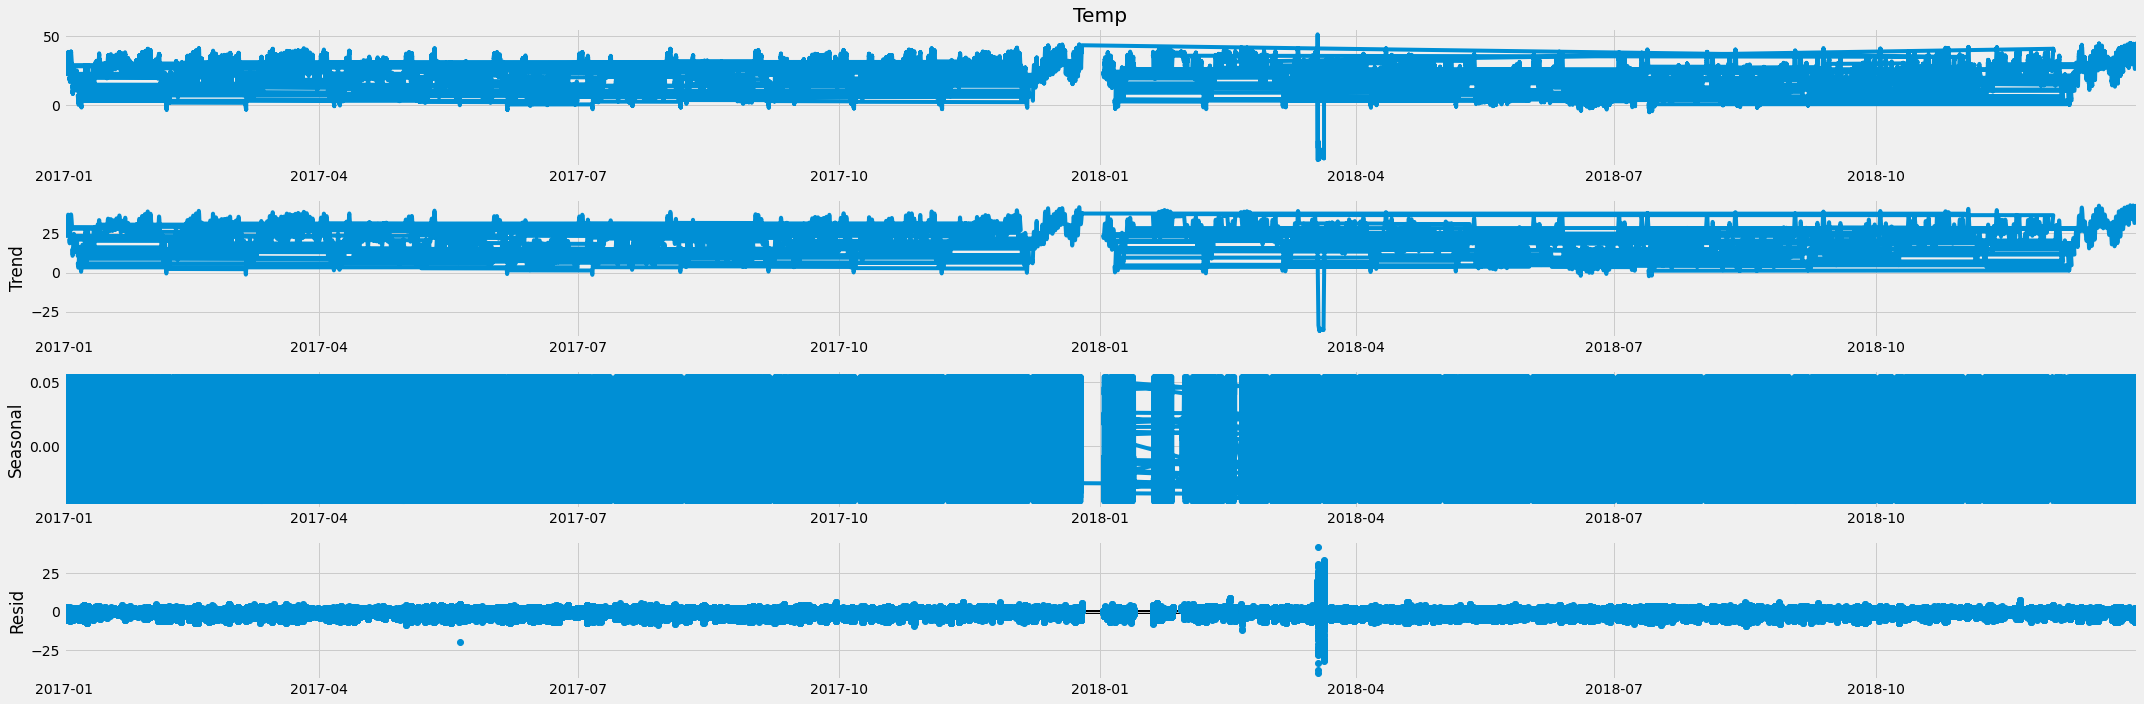

In [179]:
se_decom = sm.tsa.seasonal_decompose(sol_2y_pdf['Temp'], period = 100)
fig = se_decom.plot()
plt.show()

In [180]:
print(dir(se_decom))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_observed', '_resid', '_seasonal', '_trend', '_weights', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend', 'weights']


<AxesSubplot:xlabel='Timestamp_d'>

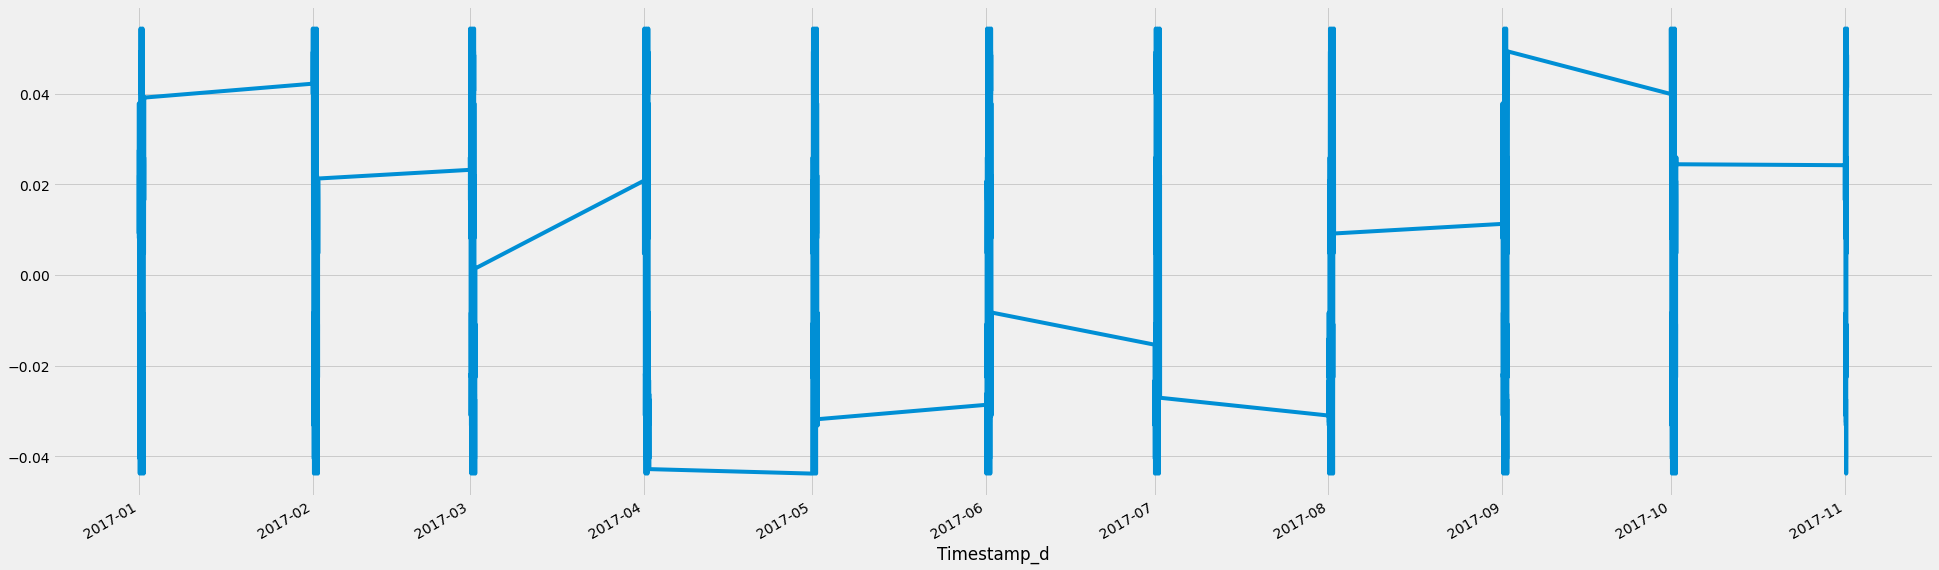

In [181]:
se_decom.seasonal[0:3000].plot()

<AxesSubplot:xlabel='Timestamp_d'>

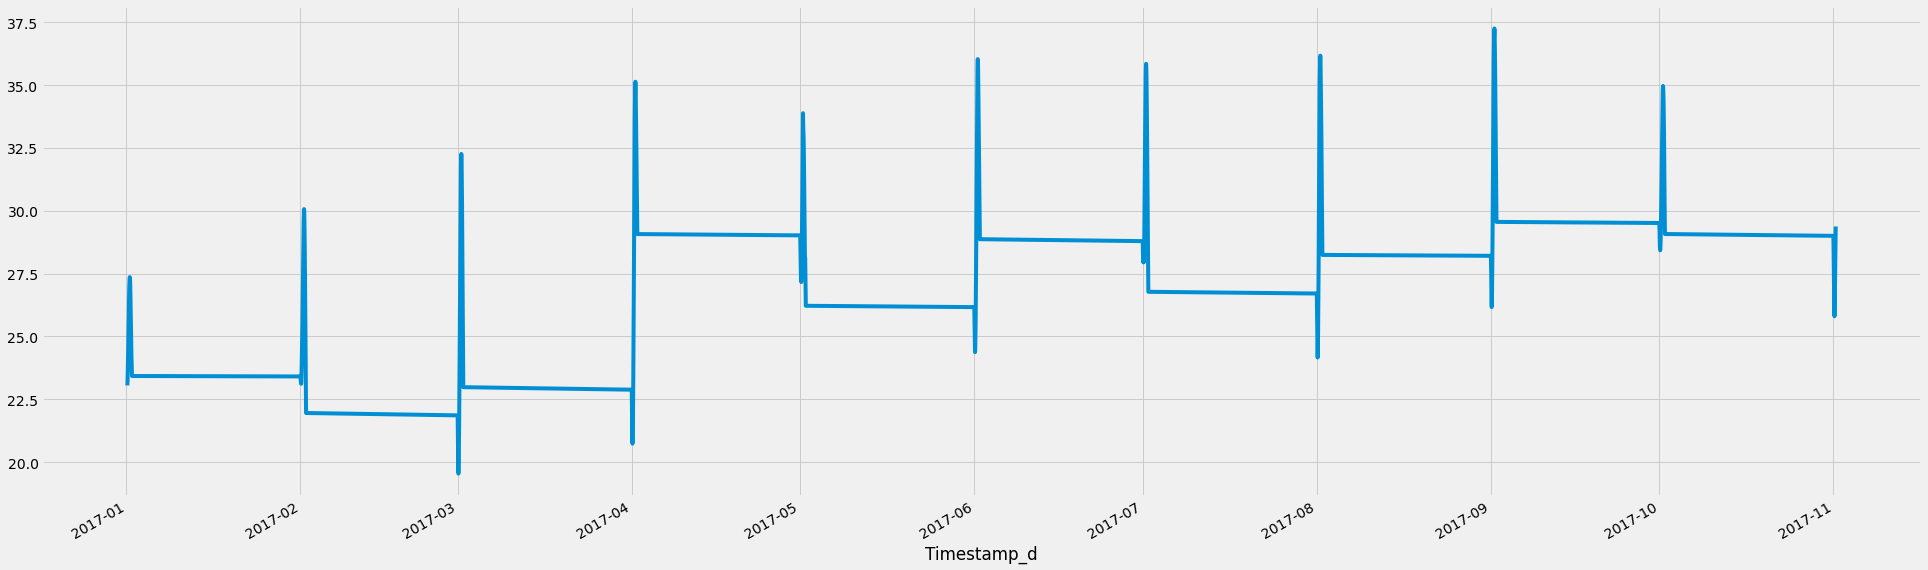

In [182]:
se_decom.trend[0:3000].plot()

### Correlation

In [183]:
sol_fill_pdf[['Power', 'Wind', 'WindD','Temp', 'GRad', 'DRad' ,'Rain']].head()

,Power,Wind,WindD,Temp,GRad,DRad,Rain
Timestamp_d,,,,,,,
2013-05-24 00:00:00,0.0,0.987729,219.366669,8.613059,3.097217,1.291908,0.0
2013-05-24 00:05:00,0.0,0.956214,216.402603,8.474399,2.898489,1.207527,0.0
2013-05-24 00:10:00,0.0,0.981474,209.872070,8.443656,2.896453,1.202139,0.0
2013-05-24 00:15:00,0.0,1.003397,223.326996,8.409176,2.936822,1.221855,0.0
2013-05-24 00:20:00,0.0,0.950703,229.209442,8.390579,2.965931,1.160901,0.0


In [184]:
# Linear correlation
p_corr = sol_fill_pdf[['Power', 'Wind', 'WindD','Temp', 'GRad', 'DRad' ,'Rain']].corr(method = 'pearson') 
p_corr

,Power,Wind,WindD,Temp,GRad,DRad,Rain
Power,1.000000,0.174634,-0.025286,0.029160,0.932707,0.347391,-0.034035
Wind,0.174634,1.000000,0.000393,0.004680,0.129646,0.077710,-0.011881
WindD,-0.025286,0.000393,1.000000,0.541537,0.116619,0.379112,0.019215
Temp,0.029160,0.004680,0.541537,1.000000,0.252631,0.610768,-0.001235
GRad,0.932707,0.129646,0.116619,0.252631,1.000000,0.572300,-0.036387
DRad,0.347391,0.077710,0.379112,0.610768,0.572300,1.000000,0.030450
Rain,-0.034035,-0.011881,0.019215,-0.001235,-0.036387,0.030450,1.000000


In [185]:
# Nonlinear correlation
sol_fill_pdf[['Power', 'Wind', 'WindD','Temp', 'GRad', 'DRad' ,'Rain']].corr(method = 'spearman') 

,Power,Wind,WindD,Temp,GRad,DRad,Rain
Power,1.000000,0.195124,-0.069720,0.474703,0.916924,0.851310,-0.012832
Wind,0.195124,1.000000,0.209879,0.066959,0.166597,0.135447,0.041803
WindD,-0.069720,0.209879,1.000000,-0.096043,-0.024809,-0.090115,0.051349
Temp,0.474703,0.066959,-0.096043,1.000000,0.437829,0.484288,0.030150
GRad,0.916924,0.166597,-0.024809,0.437829,1.000000,0.915298,-0.026717
DRad,0.851310,0.135447,-0.090115,0.484288,0.915298,1.000000,0.030024
Rain,-0.012832,0.041803,0.051349,0.030150,-0.026717,0.030024,1.000000


<AxesSubplot:>

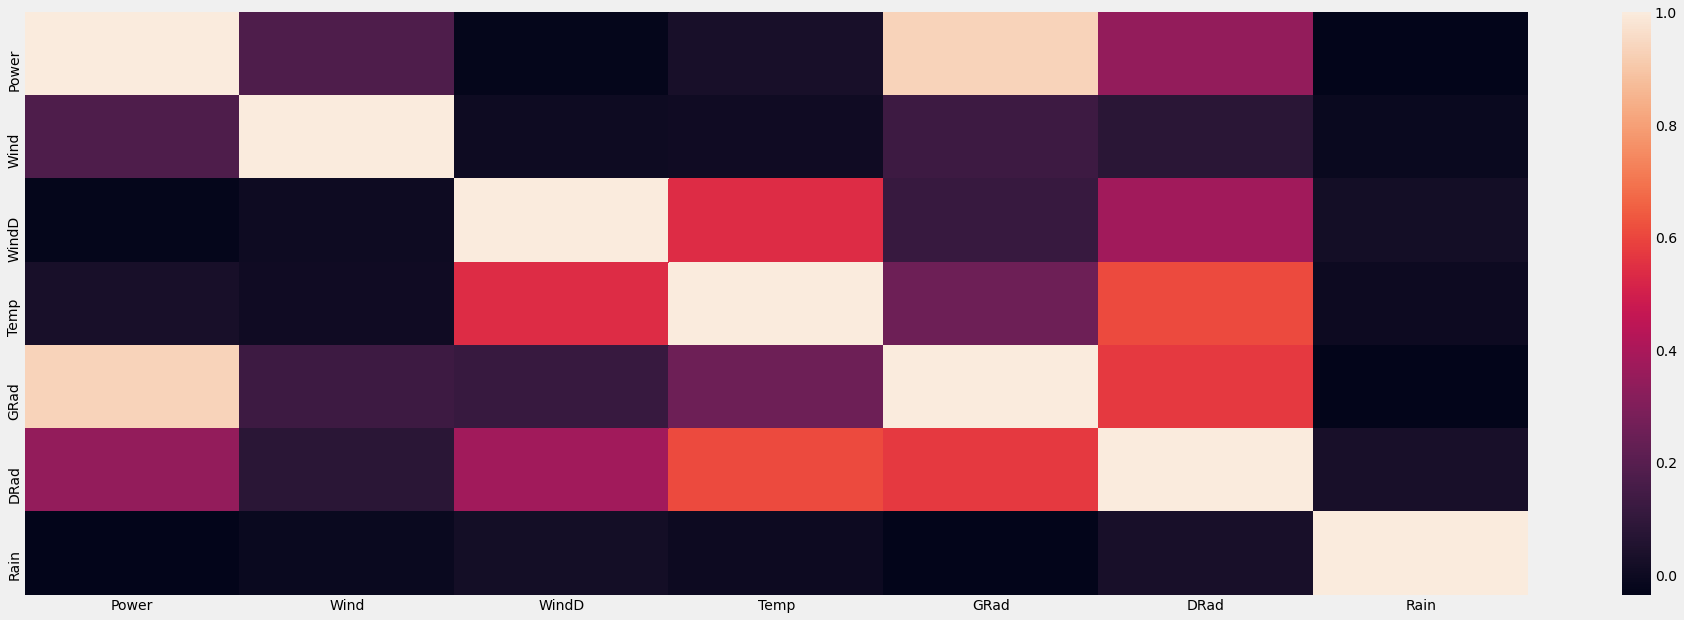

In [186]:
sns.heatmap(p_corr)

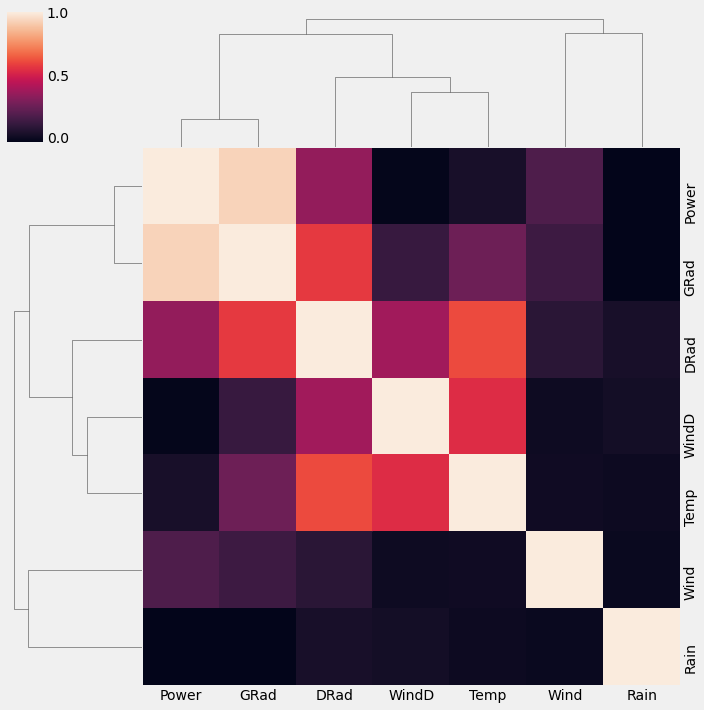

In [187]:
sns.clustermap(p_corr)

### Another visualization

In [188]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [189]:
plt.style.use('fivethirtyeight')